# Classificatie met Penguins dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.shape

(344, 7)

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Feature selection

In [6]:
# columns = list(penguins.columns)
# try:
#     columns.remove('bill_length_mm')
#     columns.remove('bill_depth_mm')
#     columns.remove('flipper_length_mm')
# except:
#     pass

# penguins = penguins[columns]
# penguins

### Remove missing values

In [7]:
penguins.dropna(inplace=True)

In [8]:
penguins.shape

(333, 7)

### Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
# np.random.seed(1000)

In [10]:
train, test = train_test_split(penguins, test_size = 133)
test = test.copy()

In [11]:
train.shape

(200, 7)

In [12]:
test.shape

(133, 7)

### Train features vs target

In [13]:
train_features = train.iloc[:,1:]
train_target = train['species']

### Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
train_numeric_features = train_features.select_dtypes(include='number')
train_numeric_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
231,49.0,16.1,216.0,5550.0
94,36.2,17.3,187.0,3300.0
164,47.0,17.3,185.0,3700.0
263,49.6,15.0,216.0,4750.0
186,49.7,18.6,195.0,3600.0
...,...,...,...,...
20,37.8,18.3,174.0,3400.0
149,37.8,18.1,193.0,3750.0
25,35.3,18.9,187.0,3800.0
197,50.8,18.5,201.0,4450.0


In [16]:
train_numeric_features.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,200.000000,200.000000,200.00000,200.000000
mean,44.002500,17.124000,201.48500,4228.750000
std,5.288049,2.073868,13.92008,775.989197
min,32.100000,13.100000,174.00000,2700.000000
25%,39.600000,15.175000,190.00000,3550.000000
50%,44.900000,17.300000,198.00000,4150.000000
75%,48.525000,18.725000,213.25000,4762.500000
max,55.100000,21.500000,231.00000,6000.000000


In [17]:
scaler = StandardScaler()

scaler.fit(train_numeric_features)

X_train_scaled = scaler.transform(train_numeric_features)

In [18]:
X_train_scaled

array([[ 9.47427095e-01, -4.95002392e-01,  1.04535495e+00,
         1.70693815e+00],
       [-1.47919958e+00,  8.50785361e-02, -1.04319438e+00,
        -1.19986286e+00],
       [ 5.68266677e-01,  8.50785361e-02, -1.18723226e+00,
        -6.83098238e-01],
       [ 1.06117522e+00, -1.02674324e+00,  1.04535495e+00,
         6.73408901e-01],
       [ 1.08013324e+00,  7.13499542e-01, -4.67042841e-01,
        -8.12289394e-01],
       [ 1.51616772e+00,  9.06859851e-01, -3.23004956e-01,
        -1.01738035e-01],
       [-1.19482927e+00, -5.43342469e-01, -1.33127015e+00,
        -1.49054296e+00],
       [-1.21378729e+00,  1.05188008e+00, -1.47530803e+00,
        -1.19986286e+00],
       [ 1.55408376e+00,  8.10179696e-01, -3.23004956e-01,
        -1.00607613e+00],
       [-1.46024156e+00,  1.14856024e+00, -8.27137552e-01,
        -5.53907082e-01],
       [ 1.13700730e+00, -3.98322237e-01,  2.05362014e+00,
         1.90072488e+00],
       [ 9.47427095e-01,  1.14856024e+00,  6.13241293e-01,
      

### One-hot coding

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
train_categorical_features = train_features.select_dtypes(include=object)
train_categorical_features

,island,sex
231,Biscoe,Male
94,Dream,Female
164,Dream,Female
263,Biscoe,Male
186,Dream,Male
...,...,...
20,Biscoe,Female
149,Dream,Male
25,Biscoe,Female
197,Dream,Male


In [21]:
train_categorical_features['island'].value_counts()

Biscoe       98
Dream        79
Torgersen    23
Name: island, dtype: int64

In [22]:
train_categorical_features['sex'].value_counts()

Male      101
Female     99
Name: sex, dtype: int64

In [23]:
onehot_encoders = {}
for column in train_categorical_features:
    onehot_encoder = OneHotEncoder()
    onehot_encoder.fit(train_categorical_features[column].values.reshape(-1,1))

    onehot_encoders[column] = onehot_encoder

In [24]:
onehot_encoders

{'island': OneHotEncoder(), 'sex': OneHotEncoder()}

In [25]:
Xs = []
for column, onehot_encoder in onehot_encoders.items():
    
    X = onehot_encoder.transform(train_categorical_features[column].values.reshape(-1,1)).toarray()
    Xs.append(X)
    
X_train_encoded = np.concatenate(Xs, axis=1)

In [26]:
X_train_encoded

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1.

In [27]:
X_train = np.concatenate((X_train_scaled, X_train_encoded), axis=1)
X_train

array([[ 0.9474271 , -0.49500239,  1.04535495, ...,  0.        ,
         0.        ,  1.        ],
       [-1.47919958,  0.08507854, -1.04319438, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56826668,  0.08507854, -1.18723226, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.64982177,  0.85851977, -1.04319438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28867147,  0.66515946, -0.03492919, ...,  0.        ,
         0.        ,  1.        ],
       [-0.28484426,  0.08507854, -1.04319438, ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
X_train.shape

(200, 9)

### Test set

In [29]:
test_features = test.iloc[:,1:]
test_target = test['species']

In [30]:
test_numeric_features = test_features.select_dtypes(include='number')
test_numeric_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
319,51.1,16.5,225.0,5250.0
123,41.4,18.5,202.0,3875.0
23,38.2,18.1,185.0,3950.0
55,41.4,18.6,191.0,3700.0
105,39.7,18.9,184.0,3550.0
...,...,...,...,...
317,46.9,14.6,222.0,4875.0
63,41.1,18.2,192.0,4050.0
40,36.5,18.0,182.0,3150.0
298,45.2,13.8,215.0,4750.0


In [31]:
X_test_scaled = scaler.transform(test_numeric_features)

In [32]:
test_categorical_features = test_features.select_dtypes(include=object)
test_categorical_features

,island,sex
319,Biscoe,Male
123,Torgersen,Male
23,Biscoe,Male
55,Biscoe,Male
105,Biscoe,Male
...,...,...
317,Biscoe,Female
63,Biscoe,Male
40,Dream,Female
298,Biscoe,Female


In [33]:
Xs = []
for column, onehot_encoder in onehot_encoders.items():
    
    X = onehot_encoder.transform(test_categorical_features[column].values.reshape(-1,1)).toarray()
    Xs.append(X)
    
X_test_encoded = np.concatenate(Xs, axis=1)

In [34]:
X_test = np.concatenate((X_test_scaled, X_test_encoded), axis=1)
X_test

array([[ 1.34554553, -0.30164208,  1.69352543, ...,  0.        ,
         0.        ,  1.        ],
       [-0.49338249,  0.66515946,  0.03708976, ...,  1.        ,
         0.        ,  1.        ],
       [-1.10003916,  0.47179915, -1.18723226, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.42232552,  0.42345908, -1.40328909, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2270223 , -1.60682417,  0.973336  , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23179741,  0.61681939, -0.10694813, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
X_test.shape

(133, 9)

### k Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, train_target)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_predict = knn_classifier.predict(X_test)

In [39]:
test['knn_predicted'] = y_predict
test['knn_correct'] = test['knn_predicted'] == test['species']

In [40]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,knn_predicted,knn_correct
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male,Gentoo,True
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male,Adelie,True
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male,Adelie,True
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male,Adelie,True
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,Adelie,True
...,...,...,...,...,...,...,...,...,...
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female,Gentoo,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male,Adelie,True
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Adelie,True
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female,Gentoo,True


In [41]:
test['knn_correct'].value_counts()

True     130
False      3
Name: knn_correct, dtype: int64

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, train_target)

DecisionTreeClassifier()

In [44]:
y_predict = dt_classifier.predict(X_test)

In [45]:
test['dt_predicted'] = y_predict
test['dt_correct'] = test['dt_predicted'] == test['species']

In [46]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,knn_predicted,knn_correct,dt_predicted,dt_correct
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male,Gentoo,True,Gentoo,True
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male,Adelie,True,Adelie,True
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male,Adelie,True,Adelie,True
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male,Adelie,True,Adelie,True
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,Adelie,True,Adelie,True
...,...,...,...,...,...,...,...,...,...,...,...
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female,Gentoo,True,Gentoo,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male,Adelie,True,Adelie,True
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Adelie,True,Adelie,True
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female,Gentoo,True,Gentoo,True


In [47]:
test['dt_correct'].value_counts()

True     128
False      5
Name: dt_correct, dtype: int64

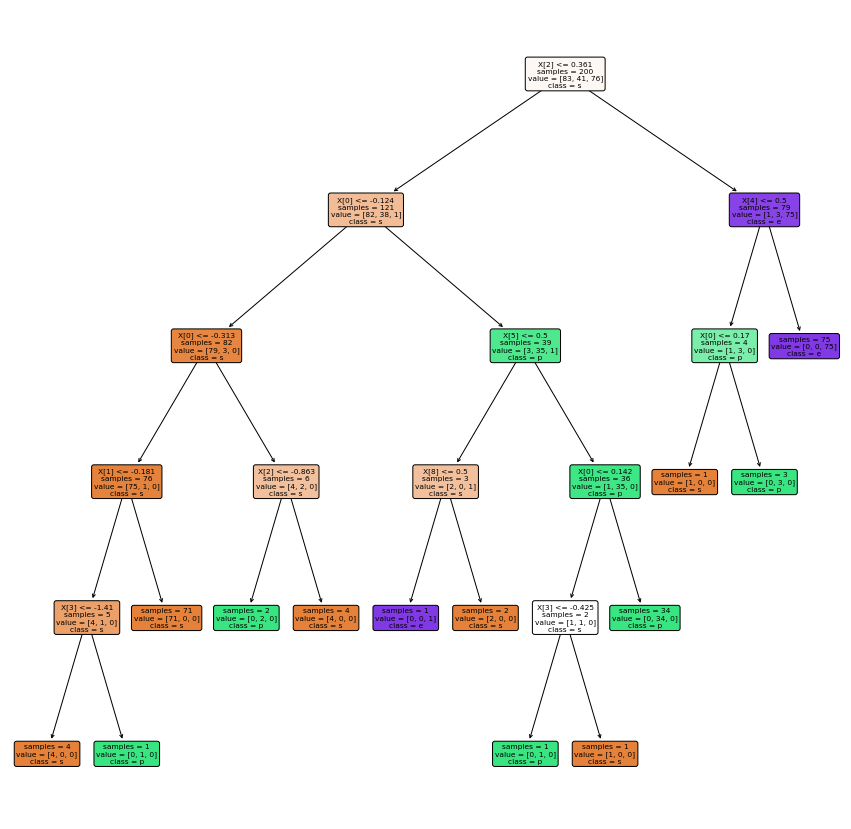

In [92]:
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree(dt_classifier, 
#                feature_names = list(train_features.columns),
               class_names = train_target.name,
               filled = True,
               rounded = True, 
               impurity = False)
plt.show()

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
nb_classifier = GaussianNB()

In [59]:
nb_classifier.fit(X_train, train_target)

GaussianNB()

In [60]:
y_predict = nb_classifier.predict(X_test)

In [61]:
test['nb_predicted'] = y_predict
test['nb_correct'] = test['nb_predicted'] == test['species']

In [62]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,knn_predicted,knn_correct,dt_predicted,dt_correct,nb_predicted,nb_correct
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male,Gentoo,True,Gentoo,True,Gentoo,True
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male,Adelie,True,Adelie,True,Adelie,True
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male,Adelie,True,Adelie,True,Gentoo,False
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male,Adelie,True,Adelie,True,Gentoo,False
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,Adelie,True,Adelie,True,Gentoo,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female,Gentoo,True,Gentoo,True,Gentoo,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male,Adelie,True,Adelie,True,Gentoo,False
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Adelie,True,Adelie,True,Chinstrap,False
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female,Gentoo,True,Gentoo,True,Gentoo,True


In [70]:
test['nb_correct'].value_counts()

True     98
False    35
Name: nb_correct, dtype: int64

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, train_target)

RandomForestClassifier()

In [67]:
y_predict = rf_classifier.predict(X_test)

In [68]:
test['rf_predicted'] = y_predict
test['rf_correct'] = test['rf_predicted'] == test['species']

In [69]:
test['rf_correct'].value_counts()

True    133
Name: rf_correct, dtype: int64

### Support Vector Machine

In [71]:
from sklearn.svm import LinearSVC

In [72]:
svm_classifier = LinearSVC()

svm_classifier.fit(X_train, train_target)

LinearSVC()

In [73]:
y_predict = svm_classifier.predict(X_test)

In [74]:
test['svm_predicted'] = y_predict
test['svm_correct'] = test['svm_predicted'] == test['species']

In [75]:
test['svm_correct'].value_counts()

True     132
False      1
Name: svm_correct, dtype: int64

### Neural Network

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
mlp_classifier = MLPClassifier(solver='lbfgs',
                               activation='relu',     #'logistic',
                               alpha=1e-5,
                               hidden_layer_sizes=(5, 5), 
                               random_state=1,
                               max_iter=1000)

mlp_classifier.fit(X_train, train_target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=1, solver='lbfgs')

In [79]:
y_predict = mlp_classifier.predict(X_test)

In [80]:
test['mlp_predicted'] = y_predict
test['mlp_correct'] = test['mlp_predicted'] == test['species']

In [81]:
test['mlp_correct'].value_counts()

True     131
False      2
Name: mlp_correct, dtype: int64

In [103]:
accuracy = 131/133
accuracy

0.9849624060150376

In [83]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,knn_predicted,knn_correct,dt_predicted,dt_correct,nb_predicted,nb_correct,rf_predicted,rf_correct,svm_predicted,svm_correct,mlp_predicted,mlp_correct
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male,Adelie,True,Adelie,True,Adelie,True,Adelie,True,Adelie,True,Adelie,True
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Adelie,True,Adelie,True,Chinstrap,False,Adelie,True,Adelie,True,Adelie,True
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True


### Visualisatie

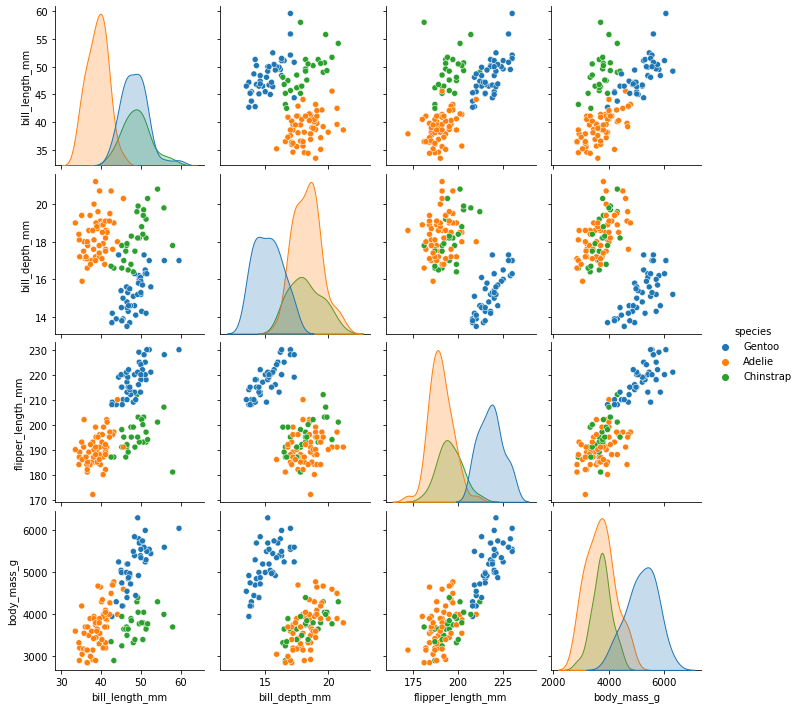

In [99]:
columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
sns.pairplot(data=test[test['dt_correct']==True], vars=columns, hue='species');

# sns.pairplot(data=test[test['dt_correct']==True], vars=columns, hue='species', joint_kws={"marker":'.'});
# sns.pairplot(data=test[test['dt_correct']==False], vars=columns, hue='species', joint_kws={"marker":'X'});

In [88]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,knn_predicted,knn_correct,dt_predicted,dt_correct,nb_predicted,nb_correct,rf_predicted,rf_correct,svm_predicted,svm_correct,mlp_predicted,mlp_correct
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male,Adelie,True,Adelie,True,Adelie,True,Adelie,True,Adelie,True,Adelie,True
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male,Adelie,True,Adelie,True,Gentoo,False,Adelie,True,Adelie,True,Adelie,True
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female,Adelie,True,Adelie,True,Chinstrap,False,Adelie,True,Adelie,True,Adelie,True
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True,Gentoo,True


### Preformance metrics

In [100]:
import sklearn.metrics as sklm

In [101]:
cm = sklm.confusion_matrix(test['species'], test['knn_predicted'])
cm

array([[60,  3,  0],
       [ 0, 27,  0],
       [ 0,  0, 43]])

In [107]:
def print_metrics(labels, scores):
    conf = sklm.confusion_matrix(labels, scores)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Confusion matrix')
    print()
    print('                 Predicted Gentoo    Predicted Adelie     Predicted Chinstrap')
    print('Actual Gentoo       %6d' % conf[0,0] + '               %5d' % conf[0,1] + '                    %5d' % conf[0,2])
    print('Actual Adelie       %6d' % conf[1,0] + '               %5d' % conf[1,1] + '                    %5d' % conf[1,2])
    print('Actual Chinstrap    %6d' % conf[2,0] + '               %5d' % conf[2,1] + '                    %5d' % conf[2,2])
    print()
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print()
    print('               Gentoo        Adelie         Chinstrap')
    print('Num case   %10d' % metrics[3][0] + '        %10d' % metrics[3][1]+ '        %10d' % metrics[3][2])
    print('Precision  %10.2f' % metrics[0][0] + '        %10.2f' % metrics[0][1] + '        %10.2f' % metrics[0][2])
    print('Recall     %10.2f' % metrics[1][0] + '        %10.2f' % metrics[1][1] + '        %10.2f' % metrics[1][2])
    print('F1         %10.2f' % metrics[2][0] + '        %10.2f' % metrics[2][1] + '        %10.2f' % metrics[2][2])

In [108]:
print_metrics(test['species'], test['dt_predicted'])

Confusion matrix

                 Predicted Gentoo    Predicted Adelie     Predicted Chinstrap
Actual Gentoo           58                   5                        0
Actual Adelie            0                  27                        0
Actual Chinstrap         0                   0                       43

Accuracy  0.96

               Gentoo        Adelie         Chinstrap
Num case           63                27                43
Precision        1.00              0.84              1.00
Recall           0.92              1.00              1.00
F1               0.96              0.92              1.00
